#1. Customization basics: tensors and operations

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

## Tensors:
A Tensor is a multi-dimensional array. Similar to NumPy ndarray objects.

The most obvious differences between NumPy arrays and tf.Tensor are:
1. Tensors can be backed by accelerator memory
2. Tensors are immutable

In [2]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In [3]:
# each tf.Tensor has a shape and a datatype
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


##1.1. NumPy Compatibility

TensorFlow operations automatically convert NumPy ndarrays to Tensors.

NumPy operations automatically convert Tensors to NumPy ndarrays.

In [4]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


##1.2. GPU acceleration

In [6]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[]
Is the Tensor on GPU #0:  
False


In [7]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.experimental.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 391.38ms


In [0]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

# Create a CSV file
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
  f.write("""Line 1
Line 2
Line 3
  """)

ds_file = tf.data.TextLineDataset(filename)

In [0]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

In [11]:
print('Elements of ds_tensors:')
for x in ds_tensors:
  print(x)

print('\nElements in ds_file:')
for x in ds_file:
  print(x)

Elements of ds_tensors:
tf.Tensor([4 1], shape=(2,), dtype=int32)
tf.Tensor([16 25], shape=(2,), dtype=int32)
tf.Tensor([ 9 36], shape=(2,), dtype=int32)

Elements in ds_file:
tf.Tensor([b'Line 1' b'Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'Line 3' b'  '], shape=(2,), dtype=string)


#2. Custom layers

In [12]:
%tensorflow_version 2.x
!pip install -q tf-nightly
import tensorflow as tf

     |████████████████████████████████| 517.6MB 33kB/s 
     |████████████████████████████████| 460kB 36.8MB/s 
     |████████████████████████████████| 3.0MB 40.3MB/s 


In [13]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


##2.1. Layers: Common sets of useful operations

In [0]:
# In the tf.keras.layers package, layers are objects. To construct a layer,
# simply construct the object. Most layers take as a first argument the number
# of output dimensions / channels.
layer = tf.keras.layers.Dense(100)
# The number of input dimensions is often unnecessary, as it can be inferred
# the first time the layer is used, but it can be provided if you want to
# specify it manually, which is useful in some complex models.
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [15]:
# To use a layer, simply call it.
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [16]:
# Layers have many useful methods. For example, you can inspect all variables
# in a layer using `layer.variables` and trainable variables using
# `layer.trainable_variables`. In this case a fully-connected layer
# will have variables for weights and biases.
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.32253557, -0.09693527,  0.2785101 ,  0.44415218,  0.03078675,
         -0.09251082, -0.3416068 , -0.10755807,  0.54424375, -0.4934789 ],
        [ 0.06511873, -0.06638962, -0.5949699 ,  0.07507068,  0.4579144 ,
         -0.06539047, -0.46398455, -0.23047036,  0.5333087 ,  0.22995389],
        [ 0.2165451 ,  0.27641958,  0.4754551 ,  0.5080299 , -0.08098447,
         -0.6072552 ,  0.19137704,  0.03101659, -0.2381927 , -0.6073065 ],
        [ 0.5285973 ,  0.3634457 , -0.27236336,  0.3228631 ,  0.6161751 ,
          0.04906797, -0.21174264,  0.19664758,  0.50729257,  0.2007168 ],
        [ 0.26367038, -0.3221969 , -0.2729261 ,  0.3663113 , -0.41304874,
          0.06025416, -0.15315834, -0.23136184, -0.28046104,  0.16676736]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [17]:
# The variables are also accessible through nice accessors
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.32253557, -0.09693527,  0.2785101 ,  0.44415218,  0.03078675,
         -0.09251082, -0.3416068 , -0.10755807,  0.54424375, -0.4934789 ],
        [ 0.06511873, -0.06638962, -0.5949699 ,  0.07507068,  0.4579144 ,
         -0.06539047, -0.46398455, -0.23047036,  0.5333087 ,  0.22995389],
        [ 0.2165451 ,  0.27641958,  0.4754551 ,  0.5080299 , -0.08098447,
         -0.6072552 ,  0.19137704,  0.03101659, -0.2381927 , -0.6073065 ],
        [ 0.5285973 ,  0.3634457 , -0.27236336,  0.3228631 ,  0.6161751 ,
          0.04906797, -0.21174264,  0.19664758,  0.50729257,  0.2007168 ],
        [ 0.26367038, -0.3221969 , -0.2729261 ,  0.3663113 , -0.41304874,
          0.06025416, -0.15315834, -0.23136184, -0.28046104,  0.16676736]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

##2.2. Implementing custom layers

The best way to implement your own layer is extending the tf.keras.Layer class and implementing:
1. __init__: for input independent initialization
2. build: shapes of the input tensors and do the rest of the initialization
3. call: forward computation

In [0]:
# Test
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    self.kernel = self.add_weight('kernel', shape=[int(input_shape[-1]), self.num_outputs])

  def call(self, input):
    return tf.matmul(input, self.kernel)

layer = MyDenseLayer(10)

In [0]:
_ = layer(tf.zeros([10, 5]))

In [21]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer/kernel:0']


##2.3. Models: Composing layers

In [0]:
class ResnetIdentityBlock(tf.keras.Model):
  def __init__(self, kernel_size, filters):
    super(ResnetIdentityBlock, self).__init__(name='')
    filters1, filters2, filters3 = filters

    self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
    self.bn2a = tf.keras.layers.BatchNormalization()

    self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn2b = tf.keras.layers.BatchNormalization()

    self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn2c = tf.keras.layers.BatchNormalization()

  def call(self, input_tensor, training=False):
    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2c(x)
    x = self.bn2c(x, training=training)

    x += input_tensor
    return tf.nn.relu(x)


block = ResnetIdentityBlock(1, [1, 2, 3])

In [0]:
_ = block(tf.zeros([1, 2, 3, 3])) 

In [24]:
block.layers

In [25]:
len(block.variables)

18

In [26]:
block.summary()

Model: "resnet_identity_block"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  4         
_________________________________________________________________
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  8         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  9         
_________________________________________________________________
batch_normalization_2 (Batch multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
________________________________________________

In [27]:
# use Sequential instead
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [28]:
my_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 1)     4         
_________________________________________________________________
batch_normalization_3 (Batch (None, None, None, 1)     4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 2)     4         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, None, 2)     8         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 3)     9         
_________________________________________________________________
batch_normalization_5 (Batch (None, None, None, 3)     12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
___________________________________________________________

#3. Automatic differentiation and gradient tape

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
# Gradient tapes
x = tf.ones((2, 2))

with tf.GradientTape() as t:
  t.watch(x)
  y = tf.reduce_sum(x)
  z = tf.multiply(y, y)

# Derivative of z with respect to the original input tensor x
dz_dx = t.gradient(z, x)
for i in [0, 1]:
  for j in [0, 1]:
    assert dz_dx[i][j].numpy() == 8.0

In [0]:
x = tf.ones((2, 2))

with tf.GradientTape() as t:
  t.watch(x)
  y = tf.reduce_sum(x)
  z = tf.multiply(y, y)

# Use the tape to compute the derivative of z with respect to the
# intermediate value y.
dz_dy = t.gradient(z, y)
assert dz_dy.numpy() == 8.0

In [0]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
  t.watch(x)
  y = x * x
  z = y * y
dz_dx = t.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = t.gradient(y, x)  # 6.0
del t  # Drop the reference to the tape

In [0]:
# Recording control flow
def f(x, y):
  output = 1.0
  for i in range(y):
    if i > 1 and i < 5:
      output = tf.multiply(output, x)
  return output

def grad(x, y):
  with tf.GradientTape() as t:
    t.watch(x)
    out = f(x, y)
  return t.gradient(out, x)

x = tf.convert_to_tensor(2.0)

assert grad(x, 6).numpy() == 12.0
assert grad(x, 5).numpy() == 12.0
assert grad(x, 4).numpy() == 4.0

In [0]:
# Higher-order gradients
x = tf.Variable(1.0)  # Create a Tensorflow variable initialized to 1.0

with tf.GradientTape() as t:
  with tf.GradientTape() as t2:
    y = x * x * x
  # Compute the gradient inside the 't' context manager
  # which means the gradient computation is differentiable as well.
  dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

assert dy_dx.numpy() == 3.0
assert d2y_dx2.numpy() == 6.0

#4. Custom Training: basics



In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [36]:
# Variables

# Using Python state
x = tf.zeros([10, 10])
x += 2  # This is equivalent to x = x + 2, which does not mutate the original
        # value of x
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [0]:
v = tf.Variable(1.0)
# Use Python's `assert` as a debugging statement to test the condition
assert v.numpy() == 1.0

# Reassign the value `v`
v.assign(3.0)
assert v.numpy() == 3.0

# Use `v` in a TensorFlow `tf.square()` operation and reassign
v.assign(tf.square(v))
assert v.numpy() == 9.0

##4.1. Fit a linear model

f(x) = x*W+b

In [0]:
# Define the model
class Model(object):
  def __init__(self):
    # W = 5.0, and b = 0.0
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()
assert model(3.0).numpy() == 15.0


In [0]:
# Define a loss function
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

In [0]:
# Obtain training data
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

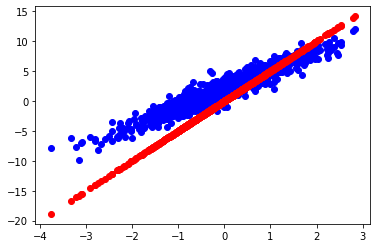

Current loss: 9.194250


In [41]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [0]:
# Define a training loop
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=9.19425
Epoch  1: W=4.58 b=0.41, loss=6.12656
Epoch  2: W=4.25 b=0.74, loss=4.20540
Epoch  3: W=3.99 b=0.99, loss=3.00218
Epoch  4: W=3.79 b=1.20, loss=2.24853
Epoch  5: W=3.63 b=1.36, loss=1.77644
Epoch  6: W=3.50 b=1.49, loss=1.48069
Epoch  7: W=3.40 b=1.60, loss=1.29540
Epoch  8: W=3.32 b=1.68, loss=1.17931
Epoch  9: W=3.26 b=1.75, loss=1.10656


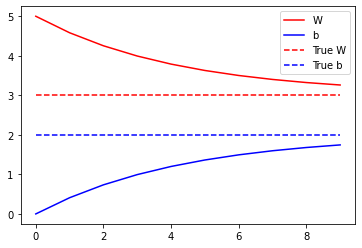

In [43]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()